In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

In [6]:
dataset,info= tfds.load('wine_quality',split='train',with_info=True)
# %%
dataset = tfds.as_dataframe(dataset.take(4500),info)
dataset.head(2).transpose()

,0,1
features/alcohol,9.0000,12.2000
features/chlorides,0.0540,0.0630
features/citric acid,0.3400,0.4900
features/density,1.0008,0.9911
features/fixed acidity,7.6000,6.3000
features/free sulfur dioxide,44.0000,35.0000
features/pH,3.2200,3.3800
features/residual sugar,18.3500,1.2000
features/sulphates,0.5500,0.4200
features/total sulfur dioxide,197.0000,92.0000


In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
features/alcohol,4500.0,10.518530,1.231333,8.00000,9.5000,10.4000,11.40000,14.200000
features/chlorides,4500.0,0.045825,0.022167,0.00900,0.0360,0.0430,0.05000,0.346000
features/citric acid,4500.0,0.333707,0.119491,0.00000,0.2700,0.3200,0.39000,1.230000
features/density,4500.0,0.994025,0.003011,0.98711,0.9917,0.9937,0.99612,1.038980
features/fixed acidity,4500.0,6.849833,0.845490,3.80000,6.3000,6.8000,7.30000,14.200000
features/free sulfur dioxide,4500.0,35.329333,17.021765,2.00000,23.0000,34.0000,46.00000,289.000000
features/pH,4500.0,3.187802,0.151019,2.72000,3.0875,3.1800,3.28000,3.820000
features/residual sugar,4500.0,6.416989,5.107076,0.60000,1.7000,5.2000,9.90000,65.800003
features/sulphates,4500.0,0.489416,0.114016,0.22000,0.4100,0.4700,0.55000,1.080000
features/total sulfur dioxide,4500.0,138.424556,42.568364,9.00000,108.0000,134.0000,167.00000,440.000000


In [74]:
dataset.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   features/alcohol               4500 non-null   float64
 1   features/chlorides             4500 non-null   float64
 2   features/citric acid           4500 non-null   float64
 3   features/density               4500 non-null   float64
 4   features/fixed acidity         4500 non-null   float64
 5   features/free sulfur dioxide   4500 non-null   float64
 6   features/pH                    4500 non-null   float64
 7   features/residual sugar        4500 non-null   float64
 8   features/sulphates             4500 non-null   float64
 9   features/total sulfur dioxide  4500 non-null   float64
 10  features/volatile acidity      4500 non-null   float64
 11  quality                        4500 non-null   int64  
dtypes: float64(11), int64(

<AxesSubplot:>

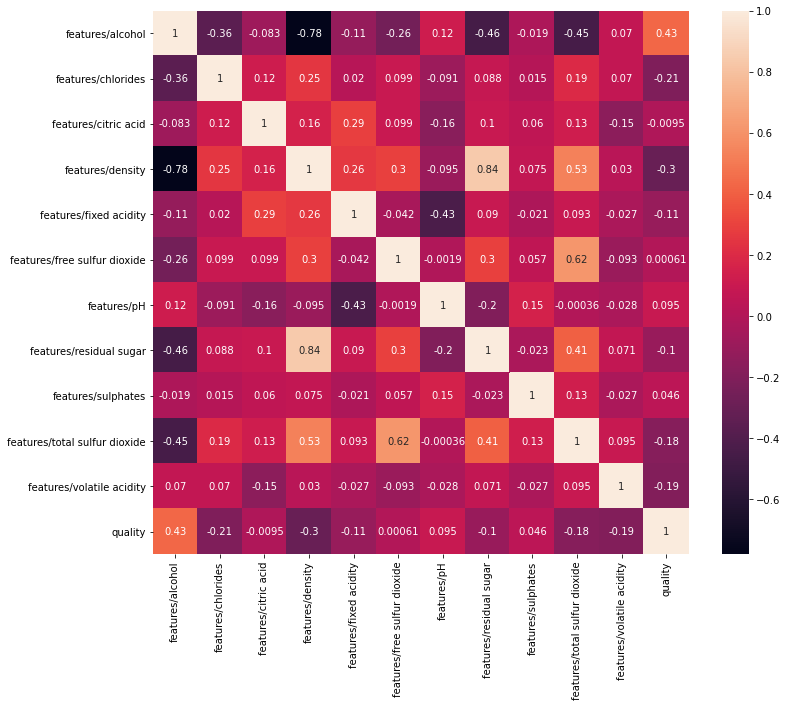

In [77]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True)

In [9]:
dataset['quality'].value_counts()

6    2040
5    1328
7     807
8     159
4     144
3      18
9       4
Name: quality, dtype: int64

In [10]:
labels = pd.get_dummies(dataset['quality'])
labels.head()

,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [84]:
features = dataset.drop(['quality','features/citric acid','features/free sulfur dioxide'],axis=1)
features.head()

,features/alcohol,features/chlorides,features/density,features/fixed acidity,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
0,9.0,0.054,1.00080,7.6,3.22,18.35,0.55,197.0,0.32
1,12.2,0.063,0.99110,6.3,3.38,1.20,0.42,92.0,0.27
2,11.2,0.029,0.99076,5.3,3.51,1.10,0.48,51.0,0.43
3,9.0,0.110,0.99672,6.6,3.08,10.70,0.41,103.0,0.41
4,12.0,0.035,0.99016,5.9,3.09,3.80,0.34,135.0,0.34


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [146]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.3, random_state=42)

In [147]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [157]:
model = Sequential()
model.add(Dense(units=9,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=7,activation='softmax'))
model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['accuracy'])

In [158]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=0,
          callbacks=[early_stop], batch_size=128,
          )

<AxesSubplot:>

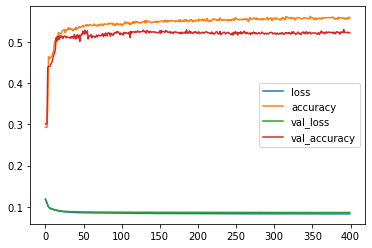

In [159]:
pd.DataFrame( model.history.history).plot()

In [160]:
preds = model.predict(X_test)
preds

array([[0.00701737, 0.01757749, 0.4262364 , ..., 0.06906335, 0.00576693,
        0.00196823],
       [0.00948033, 0.06146457, 0.58702004, ..., 0.03366998, 0.00568219,
        0.00335514],
       [0.0053405 , 0.00663045, 0.14578031, ..., 0.19481753, 0.02170296,
        0.00179887],
       ...,
       [0.00387624, 0.00514269, 0.13006715, ..., 0.19189337, 0.02332517,
        0.00122896],
       [0.01603328, 0.01748117, 0.27695557, ..., 0.10709383, 0.00773383,
        0.0048926 ],
       [0.00175848, 0.00351941, 0.05614262, ..., 0.33048052, 0.09511015,
        0.00089337]], dtype=float32)

In [161]:
from tensorflow.keras.metrics import CategoricalAccuracy

In [162]:
m = CategoricalAccuracy()
m.update_state(y_test,preds)
m.result().numpy()

0.52148145